In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D

from tensorflow.keras.optimizers import Adam


print(tf.__version__)

2.11.0


In [ ]:
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
cancer_df = pd.read_csv("/content/data.csv")

In [ ]:
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
del cancer_df["Unnamed: 32"]

In [ ]:
x = cancer_df.drop(["diagnosis","id"],axis=1)
print(x)
y = cancer_df["diagnosis"]
print(y)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

Label encoding the column "diagnosis"
1 - Malignant(M)
0 - Benign(B)


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y=cancer_df["diagnosis"] = labelencoder.fit_transform(cancer_df["diagnosis"])

In [ ]:
print(cancer_df.head())

         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  ar

Splitting the data into training and testing set

Test case 1(80-20)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)

In [ ]:
x_train.shape

(455, 30)

In [ ]:
x_test.shape

(114, 30)

Feature Scaling

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Reshaping the data

In [ ]:
x_train = x_train.reshape(455,30,1)
x_test = x_test.reshape(114, 30, 1)

Defining the layers

1) epochs=50

In [ ]:
epochs = 50
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape = (30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 32)            96        
                                                                 
 batch_normalization (BatchN  (None, 29, 32)           128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 29, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 28, 64)            0

Compiling the model

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.00005), loss = 'binary_crossentropy', metrics=['accuracy'])

Fitting the model

In [ ]:
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), verbose=1)

Epoch 1/50
15/15 [==============================] - 3s 64ms/step - loss: 0.9799 - accuracy: 0.5824 - val_loss: 0.6832 - val_accuracy: 0.5965
Epoch 2/50
15/15 [==============================] - 0s 28ms/step - loss: 0.7363 - accuracy: 0.6769 - val_loss: 0.6600 - val_accuracy: 0.6579
Epoch 3/50
15/15 [==============================] - 0s 21ms/step - loss: 0.4815 - accuracy: 0.7846 - val_loss: 0.6386 - val_accuracy: 0.6754
Epoch 4/50
15/15 [==============================] - 0s 13ms/step - loss: 0.4406 - accuracy: 0.8242 - val_loss: 0.6163 - val_accuracy: 0.6930
Epoch 5/50
15/15 [==============================] - 0s 13ms/step - loss: 0.3752 - accuracy: 0.8396 - val_loss: 0.5930 - val_accuracy: 0.7632
Epoch 6/50
15/15 [==============================] - 0s 13ms/step - loss: 0.3277 - accuracy: 0.8571 - val_loss: 0.5655 - val_accuracy: 0.7982
Epoch 7/50
15/15 [==============================] - 0s 15ms/step - loss: 0.3207 - accuracy: 0.8615 - val_loss: 0.5363 - val_accuracy: 0.8246
Epoch 8/50
15

In [ ]:
history.history

{'loss': [0.9799124002456665,
  0.7363051772117615,
  0.4814606308937073,
  0.44060277938842773,
  0.3751814663410187,
  0.32773086428642273,
  0.32069942355155945,
  0.284616619348526,
  0.27343156933784485,
  0.21315927803516388,
  0.26781412959098816,
  0.19881115853786469,
  0.23870082199573517,
  0.21420620381832123,
  0.13827234506607056,
  0.17890729010105133,
  0.1320960968732834,
  0.17806793749332428,
  0.16668276488780975,
  0.2174980193376541,
  0.19207242131233215,
  0.15441101789474487,
  0.18144336342811584,
  0.17063617706298828,
  0.13090308010578156,
  0.12864422798156738,
  0.1459224373102188,
  0.1045055016875267,
  0.18876422941684723,
  0.11476748436689377,
  0.14032451808452606,
  0.09721893817186356,
  0.11656055599451065,
  0.10162915289402008,
  0.14024463295936584,
  0.1403270810842514,
  0.11717164516448975,
  0.11442792415618896,
  0.10625750571489334,
  0.11783420294523239,
  0.11940263956785202,
  0.10608552396297455,
  0.12756773829460144,
  0.1011533737

In [ ]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

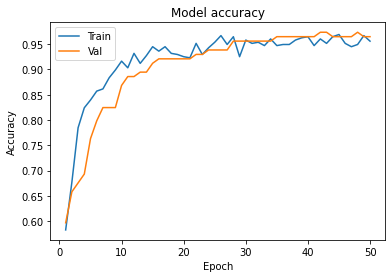

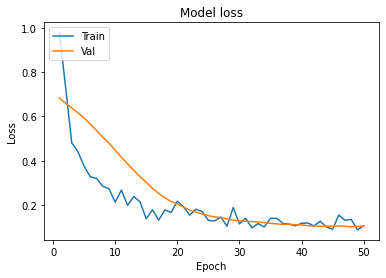

In [ ]:
plot_learningCurve(history, epochs)

2) epochs = 40

In [ ]:
epochs = 40
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape = (30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.00005), loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), verbose=1)

Epoch 1/40
15/15 [==============================] - 5s 48ms/step - loss: 0.8844 - accuracy: 0.6110 - val_loss: 0.6567 - val_accuracy: 0.8333
Epoch 2/40
15/15 [==============================] - 1s 36ms/step - loss: 0.6398 - accuracy: 0.7275 - val_loss: 0.6160 - val_accuracy: 0.9123
Epoch 3/40
15/15 [==============================] - 0s 31ms/step - loss: 0.5615 - accuracy: 0.7780 - val_loss: 0.5769 - val_accuracy: 0.9298
Epoch 4/40
15/15 [==============================] - 1s 36ms/step - loss: 0.4320 - accuracy: 0.8066 - val_loss: 0.5416 - val_accuracy: 0.9298
Epoch 5/40
15/15 [==============================] - 1s 34ms/step - loss: 0.3739 - accuracy: 0.8484 - val_loss: 0.5083 - val_accuracy: 0.9035
Epoch 6/40
15/15 [==============================] - 1s 49ms/step - loss: 0.3283 - accuracy: 0.8659 - val_loss: 0.4767 - val_accuracy: 0.8947
Epoch 7/40
15/15 [==============================] - 1s 46ms/step - loss: 0.3076 - accuracy: 0.8901 - val_loss: 0.4482 - val_accuracy: 0.8860
Epoch 8/40
15

In [ ]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

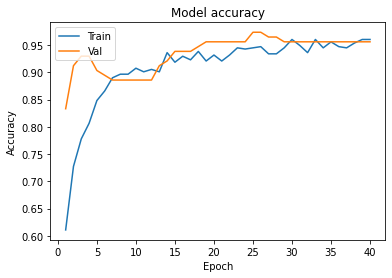

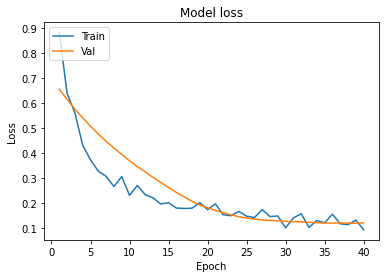

In [ ]:
plot_learningCurve(history, epochs)

3)epochs=45

In [ ]:
epochs = 45
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape = (30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.00005), loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), verbose=1)

Epoch 1/45
15/15 [==============================] - 3s 43ms/step - loss: 0.8759 - accuracy: 0.5978 - val_loss: 0.6550 - val_accuracy: 0.7632
Epoch 2/45
15/15 [==============================] - 0s 20ms/step - loss: 0.6580 - accuracy: 0.7121 - val_loss: 0.6092 - val_accuracy: 0.8947
Epoch 3/45
15/15 [==============================] - 0s 21ms/step - loss: 0.5077 - accuracy: 0.7736 - val_loss: 0.5648 - val_accuracy: 0.9211
Epoch 4/45
15/15 [==============================] - 0s 21ms/step - loss: 0.4406 - accuracy: 0.8242 - val_loss: 0.5263 - val_accuracy: 0.9211
Epoch 5/45
15/15 [==============================] - 0s 19ms/step - loss: 0.3830 - accuracy: 0.8308 - val_loss: 0.4905 - val_accuracy: 0.9386
Epoch 6/45
15/15 [==============================] - 0s 21ms/step - loss: 0.3268 - accuracy: 0.8505 - val_loss: 0.4548 - val_accuracy: 0.9386
Epoch 7/45
15/15 [==============================] - 0s 22ms/step - loss: 0.3148 - accuracy: 0.8835 - val_loss: 0.4166 - val_accuracy: 0.9386
Epoch 8/45
15

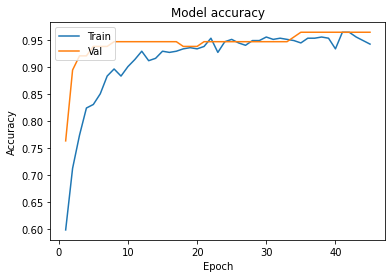

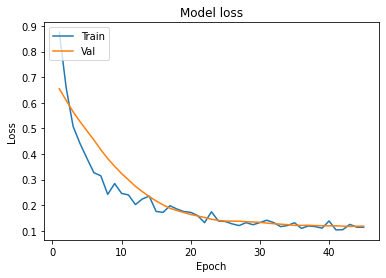

In [ ]:
plot_learningCurve(history, epochs)